In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('credit_risk_dataset.csv')
df.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


In [ ]:
df.person_emp_length.fillna(df.person_emp_length.mean(), inplace=True)
df.loan_int_rate.fillna(df.loan_int_rate.mean(), inplace=True)
df.isna().sum()

/tmp/ipython-input-104898144.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df.person_emp_length.fillna(df.person_emp_length.mean(), inplace=True)
/tmp/ipython-input-104898144.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, in

,0
person_age,0
person_income,0
person_home_ownership,0
person_emp_length,0
loan_intent,0
loan_grade,0
loan_amnt,0
loan_int_rate,0
loan_status,0
loan_percent_income,0


In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

df["person_home_ownership"] = le.fit_transform(df["person_home_ownership"])
df["loan_intent"] = le.fit_transform(df["loan_intent"])
df["loan_grade"] = le.fit_transform(df["loan_grade"])
df["cb_person_default_on_file"] = le.fit_transform(df["cb_person_default_on_file"])

In [ ]:
df.drop(columns=["person_age"], inplace=True)

In [ ]:
x = df.iloc[:, df.columns != 'loan_status']
y = df['loan_status']

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Scale the features
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
ann = tf.keras.models.Sequential()
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

In [ ]:
ann.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history = ann.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)

Epoch 1/50
652/652 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7474 - loss: 0.5384 - val_accuracy: 0.8366 - val_loss: 0.3883
Epoch 2/50
652/652 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8438 - loss: 0.3702 - val_accuracy: 0.8406 - val_loss: 0.3757
Epoch 3/50
652/652 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8535 - loss: 0.3516 - val_accuracy: 0.8471 - val_loss: 0.3677
Epoch 4/50
652/652 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8487 - loss: 0.3574 - val_accuracy: 0.8486 - val_loss: 0.3624
Epoch 5/50
652/652 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8551 - loss: 0.3486 - val_accuracy: 0.8517 - val_loss: 0.3578
Epoch 6/50
652/652 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8561 - loss: 0.3477 - val_accuracy: 0.8569 - val_loss: 0.3561
Epoch 7/50
652/652 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8622 - loss: 0.3422 - val_accuracy: 0.8582 - val_loss: 0.3522
Epoch 8/50
652/652 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8688 - loss: 0.3276 - val_accuracy: 0.

In [ ]:
y_pred = ann.predict(X_test)
y_pred = (y_pred > 0.5)

from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
print("Accuracy:", accuracy_score(y_test, y_pred))

204/204 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
[[4855  217]
 [ 597  848]]
Accuracy: 0.8750959030228633


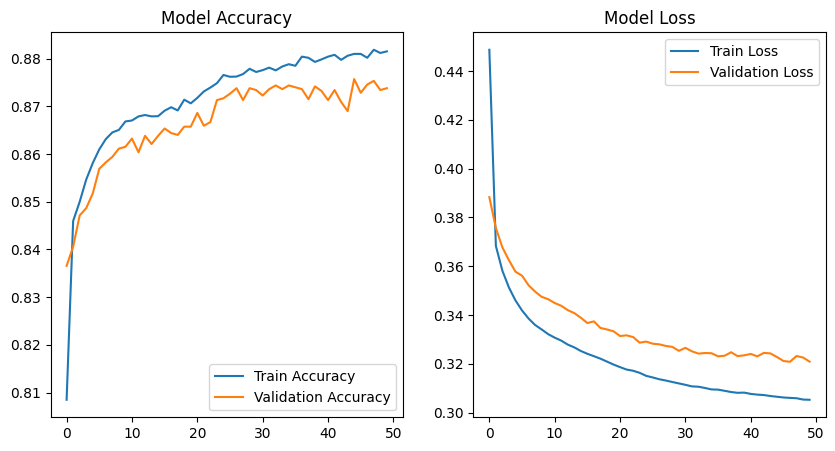

<Axes: >

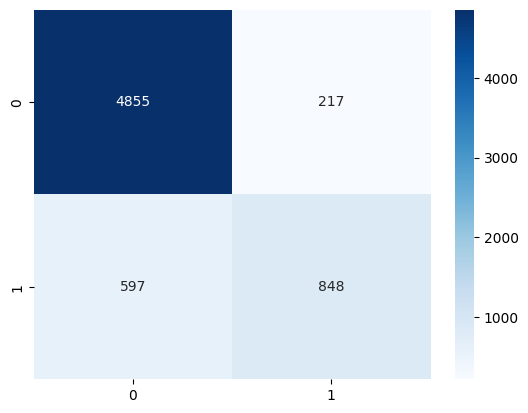

In [ ]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.legend()
plt.show()

sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')

/tmp/ipython-input-1249010718.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feat_imp_df.head(10), palette='Blues_r')


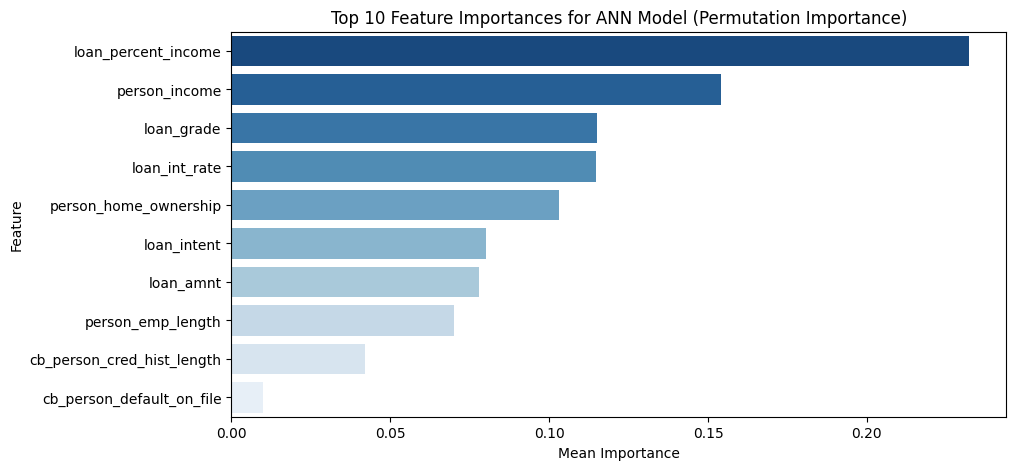

In [ ]:
plt.figure(figsize=(10, 5))
sns.barplot(x='Importance', y='Feature', data=feat_imp_df.head(10), palette='Blues_r')
plt.title('Top 10 Feature Importances for ANN Model (Permutation Importance)')
plt.xlabel('Mean Importance')
plt.ylabel('Feature')
plt.show()